In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("raw-data.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_13988\2299653948.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("raw-data.csv")


In [2]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933257 entries, 0 to 933256
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    933257 non-null  object
 1   source_id     119528 non-null  object
 2   source_name   867338 non-null  object
 3   author        753810 non-null  object
 4   title         866788 non-null  object
 5   description   863921 non-null  object
 6   url           804149 non-null  object
 7   url_to_image  748719 non-null  object
 8   published_at  804149 non-null  object
 9   content       803683 non-null  object
 10  category      803767 non-null  object
dtypes: object(11)
memory usage: 78.3+ MB
None


In [3]:
# Display the first few rows of the dataset to understand its structure
print(data.head())


  article_id source_id     source_name  \
0     594424       NaN          Forbes   
1     594425       NaN          Forbes   
2     594426       NaN          Forbes   
3     594427       NaN  Slickdeals.net   
4     594428       NaN        STERN.de   

                                              author  \
0  Gemma Allen, Contributor, \n Gemma Allen, Cont...   
1  Forbes Vetted Paid Program With Wayfair, Contr...   
2  Kari Molvar, Forbes Staff, \n Kari Molvar, For...   
3                                       RobloxAspect   
4                                           STERN.de   

                                               title  \
0  A Twist For Adam Neumann, Sam Altman, And The ...   
1  21 Best Wayfair Deals To Shop During Black Fri...   
2  The Best Black Friday Jacket Deals To Stay War...   
3  CyberPowerPC - Gamer Supreme Gaming Desktop - ...   
4  Tod von John F. Kennedy: Das sind die wildeste...   

                                         description  \
0  Adam Neumann t

In [5]:
# Check the unique categories and their counts
category_counts = data['category'].value_counts()
print(category_counts)




News                         12897
Google                       12796
world                        12795
Amazon                       12698
Instagram                    12600
                             ...  
Guadeloupe                     100
Isle of Man                    100
Tuvalu                         100
Macao                           99
Taiwan, Province of China       99
Name: category, Length: 258, dtype: int64


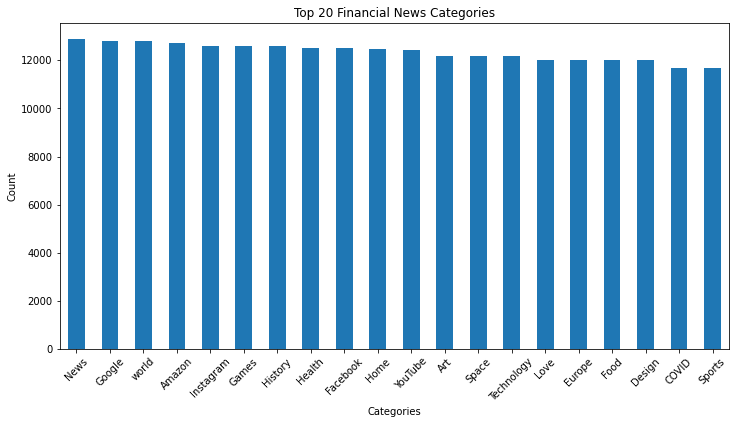

In [6]:
# Select the top N categories to plot
top_categories = category_counts.head(20)  # You can adjust the number as needed

# Plotting the distribution of top N categories
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top 20 Financial News Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re
from tqdm import tqdm


# Drop rows with missing values in 'content' column
data.dropna(subset=['content'], inplace=True)

# Function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove extra whitespaces
    text = re.sub('\s+', ' ', text).strip()
    return text

# Apply text preprocessing to the 'content' column with tqdm progress bar
with tqdm(total=len(data), desc="Preprocessing Text", unit="rows") as pbar:
    data['content_cleaned'] = data['content'].apply(lambda x: preprocess_text(x))
    pbar.update(len(data))

# Display the cleaned data
print(data.head())

Preprocessing Text: 100%|██████████| 803683/803683 [05:38<00:00, 2371.26rows/s]

  article_id source_id     source_name  \
0     594424       NaN          Forbes   
1     594425       NaN          Forbes   
2     594426       NaN          Forbes   
3     594427       NaN  Slickdeals.net   
4     594428       NaN        STERN.de   

                                              author  \
0  Gemma Allen, Contributor, \n Gemma Allen, Cont...   
1  Forbes Vetted Paid Program With Wayfair, Contr...   
2  Kari Molvar, Forbes Staff, \n Kari Molvar, For...   
3                                       RobloxAspect   
4                                           STERN.de   

                                               title  \
0  A Twist For Adam Neumann, Sam Altman, And The ...   
1  21 Best Wayfair Deals To Shop During Black Fri...   
2  The Best Black Friday Jacket Deals To Stay War...   
3  CyberPowerPC - Gamer Supreme Gaming Desktop - ...   
4  Tod von John F. Kennedy: Das sind die wildeste...   

                                         description  \
0  Adam Neumann t

In [8]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

# Example function for text summarization using LexRank algorithm
def generate_summary(text, sentences_count=2):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return " ".join(str(sentence) for sentence in summary)

# Apply text summarization to the 'content' column
data['summary'] = data['content'].apply(generate_summary)

# Display the summaries
print(data[['content', 'summary']].head())


                                             content  \
0  LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...   
1  This article was created in partnership with W...   
2  Temperatures are starting to plummet, which me...   
3  The dead Dell Aurora deal was a hit partly due...   
4  Der Mord an John F. Kennedy rief zahlreiche Ve...   

                                             summary  
0  LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...  
1  This article was created in partnership with W...  
2  Temperatures are starting to plummet, which me...  
3  The dead Dell Aurora deal was a hit partly due...  
4  Der Mord an John F. Kennedy rief zahlreiche Ve...  


In [10]:
import nltk

# Function to calculate ROUGE scores for a single article
def calculate_rouge_scores(summary, reference):
    # Tokenize summaries and references
    summary_tokens = nltk.word_tokenize(summary)
    reference_tokens = nltk.word_tokenize(reference)
    
    # Calculate unigram overlap (ROUGE-1)
    intersection = len(set(summary_tokens) & set(reference_tokens))
    rouge_1_precision = intersection / len(summary_tokens)
    rouge_1_recall = intersection / len(reference_tokens)
    rouge_1_f1 = 2 * (rouge_1_precision * rouge_1_recall) / (rouge_1_precision + rouge_1_recall + 1e-9)
    
    return {'rouge-1': {'precision': rouge_1_precision, 'recall': rouge_1_recall, 'f1': rouge_1_f1}}

# Example usage
article_index = 0  # Change this index to evaluate a different article
summary = data.loc[article_index, 'summary']
reference = data.loc[article_index, 'content']  # Use the original content as the reference summary
rouge_scores = calculate_rouge_scores(summary, reference)
print("ROUGE scores for article {}: {}".format(article_index, rouge_scores))


ROUGE scores for article 0: {'rouge-1': {'precision': 0.9090909090909091, 'recall': 0.9090909090909091, 'f1': 0.909090908590909}}


In [11]:
# Calculate ROUGE scores for the first 20 articles
rouge_scores_list = []
for article_index in range(20):
    summary = data.loc[article_index, 'summary']
    reference = data.loc[article_index, 'content']  # Use the original content as the reference summary
    rouge_scores = calculate_rouge_scores(summary, reference)
    rouge_scores_list.append(rouge_scores)

# Display ROUGE scores for each article
for article_index, rouge_scores in enumerate(rouge_scores_list):
    print("ROUGE scores for article {}: {}".format(article_index, rouge_scores))

ROUGE scores for article 0: {'rouge-1': {'precision': 0.9090909090909091, 'recall': 0.9090909090909091, 'f1': 0.909090908590909}}
ROUGE scores for article 1: {'rouge-1': {'precision': 0.9487179487179487, 'recall': 0.9487179487179487, 'f1': 0.9487179482179486}}
ROUGE scores for article 2: {'rouge-1': {'precision': 0.8409090909090909, 'recall': 0.8409090909090909, 'f1': 0.8409090904090909}}
ROUGE scores for article 3: {'rouge-1': {'precision': 0.9555555555555556, 'recall': 0.9555555555555556, 'f1': 0.9555555550555556}}
ROUGE scores for article 4: {'rouge-1': {'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1': 0.9444444439444444}}
ROUGE scores for article 5: {'rouge-1': {'precision': 1.0, 'recall': 1.0, 'f1': 0.9999999995}}
ROUGE scores for article 6: {'rouge-1': {'precision': 0.8604651162790697, 'recall': 0.8604651162790697, 'f1': 0.8604651157790697}}
ROUGE scores for article 7: {'rouge-1': {'precision': 0.8, 'recall': 0.8, 'f1': 0.7999999995000001}}
ROUGE scores for ar

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Choose a sample article (for example, the first article in the dataset)
chosen_article_index = 0
chosen_article_content = data.loc[chosen_article_index, 'content']

# Preprocess the text of the chosen article and all other articles
def preprocess_text(text):
    # Implement text preprocessing here (e.g., lowercasing, removing stopwords, punctuation, etc.)
    return text

data['content_preprocessed'] = data['content'].apply(preprocess_text)
chosen_article_content_preprocessed = preprocess_text(chosen_article_content)

# Compute TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['content_preprocessed'])
chosen_article_tfidf_vector = vectorizer.transform([chosen_article_content_preprocessed])

# Calculate cosine similarity
cosine_similarities = cosine_similarity(chosen_article_tfidf_vector, tfidf_matrix).flatten()

# Set similarity threshold (for example, 0.5)
similarity_threshold = 0.5

# Retrieve similar articles
similar_articles_indices = [i for i, similarity in enumerate(cosine_similarities) if similarity >= similarity_threshold]
similar_articles = data.iloc[similar_articles_indices]

# Evaluate effectiveness
print("Chosen Article:")
print(chosen_article_content)
print("\nSimilar Articles:")
print(similar_articles['content'])

# You can further evaluate by comparing the summaries or other relevant information


Chosen Article:
LOS ANGELES, CA - JANUARY 09: Adam Neumann speaks onstage during WeWork Presents Second Annual ... [+] Creator Global Finals at Microsoft Theater on January 9, 2019 in Los Angeles, California. (Photo… [+8692 chars]

Similar Articles:
0         LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
1217      LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
3651      LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
7051      LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
16158     LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
20880     LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
21812     LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
922583    LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
926299    LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
928491    LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
932269    LOS ANGELES, CA - JANUARY 09: Adam Neumann spe...
Name: content, dtype: object


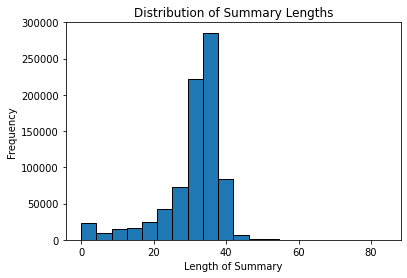

In [14]:
# Analyze the length of summaries
summary_lengths = data['summary'].apply(lambda x: len(x.split()))
plt.hist(summary_lengths, bins=20, edgecolor='black')
plt.title('Distribution of Summary Lengths')
plt.xlabel('Length of Summary')
plt.ylabel('Frequency')
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# Keyword analysis (example)
vectorizer = CountVectorizer(max_features=50)
X = vectorizer.fit_transform(data['content_preprocessed'])
vocab = vectorizer.get_feature_names_out()
word_counts = X.sum(axis=0).A1
word_freq = dict(zip(vocab, word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
top_keywords = sorted_word_freq[:20]
print("Top keywords:", top_keywords)

Top keywords: [('the', 1047112), ('chars', 760220), ('of', 489921), ('in', 454809), ('to', 451842), ('and', 397836), ('on', 232729), ('is', 202175), ('for', 194447), ('de', 184254), ('with', 136868), ('that', 126457), ('has', 122877), ('by', 117549), ('as', 114017), ('2023', 109219), ('at', 107957), ('its', 99390), ('li', 93939), ('from', 93011)]
